In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Mall_customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df_model = df.copy()

In [6]:
df_model.drop(['CustomerID'], axis=1, inplace=True)

In [7]:
df_model.columns = ['Gender','Age', 'AnnualIncome', 'SpendingScore']

In [ ]:
#df_model['AnnualIncome'] = df_model['AnnualIncome'].apply(lambda x: x*1000)

In [12]:
df_model.Gender.value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [9]:
df_model['Gender'] = df_model['Gender'].map({'Female': 0, 'Male':1})

In [10]:
df_model.head()

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [11]:
df_model.shape

(200, 4)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df_model[['AnnualIncome','SpendingScore']])

# <strong> KMeans </strong>

In [14]:
from sklearn.cluster import KMeans

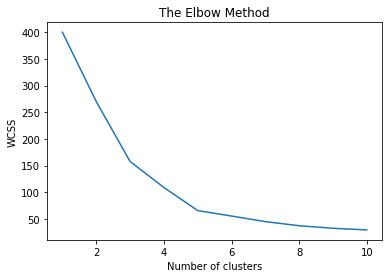

In [25]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, n_init=10, init = 'k-means++', random_state = 12345)
    model.fit(X)
    wcss.append(model.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
wcss[95:]

[0.59072647662225, 0.5694091731296496, 0.5535950559381518, 0.5272580080481841]

In [26]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_scores = []
for i in range(2, 11):
    model = KMeans(n_clusters=i, n_init=10,  init='k-means++', random_state=12345)
    model.fit(X)
    score = silhouette_score(X, model.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
km_model = KMeans(n_clusters=5, random_state=12345)
km_model.fit(X)

In [ ]:
df_model['ClusterNumber'] = km_model.predict(X)

In [ ]:
colors = ['red', 'blue', 'green', 'cyan','magenta']
for i in np.arange(0,5,1):
    plt.scatter(df_model[df_model.ClusterNumber == i]['SpendingScore'], df_model[df_model.ClusterNumber == i]['AnnualIncome'], c=colors[i], label=f'cluster{i}')
plt.ylabel('Annual Income ($)')
plt.xlabel('Spending Score (1-100)')
plt.show()

# <strong> Dendrogram and Agglomerative Clustering </strong>

## **DBSCAN**